## In this notebook I train a model on the entire Udacity challenge #2 dataset

In [1]:
from fastai.vision.all import *

In [14]:
path = Path('/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/')

## Looking at Data

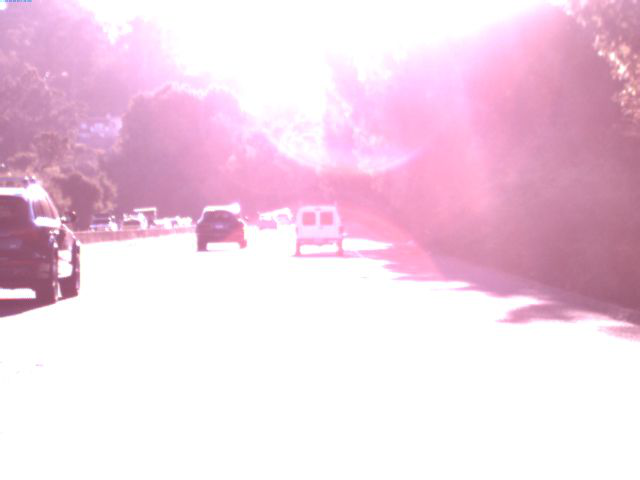

In [3]:
img = PILImage.create(path/'HMB_1/center/1479424215880976321.jpg')
img

In [4]:
df = pd.read_csv(path/'finalInterpolated.csv')
len(df)

101396

In [5]:
df

,filename,angle
0,HMB_1/left/1479424215873184606.jpg,0.000360
1,HMB_1/right/1479424215877284689.jpg,0.000717
2,HMB_1/center/1479424215880976321.jpg,0.001039
3,HMB_1/left/1479424215922817911.jpg,0.003491
4,HMB_1/right/1479424215927281227.jpg,0.003491
...,...,...
101391,HMB_6/center/1479426572293518518.jpg,0.000000
101392,HMB_6/right/1479426572303971946.jpg,0.000000
101393,HMB_6/left/1479426572317632186.jpg,0.000000
101394,HMB_6/center/1479426572343447996.jpg,0.000000


## Creat DataLoader

In [6]:
drive = DataBlock(
                  blocks = (ImageBlock, RegressionBlock(n_out=1)), 
                  n_inp = 1, 
                  item_tfms = Resize(224),  
                  splitter = RandomSplitter(),
                  get_y = ColReader('angle'),
                  get_x = ColReader('filename', pref=str(path) + os.path.sep)
                )

In [7]:
#drive.summary(df)

In [9]:
#dls.one_batch()

In [8]:
dls = drive.dataloaders(df, bs=4)

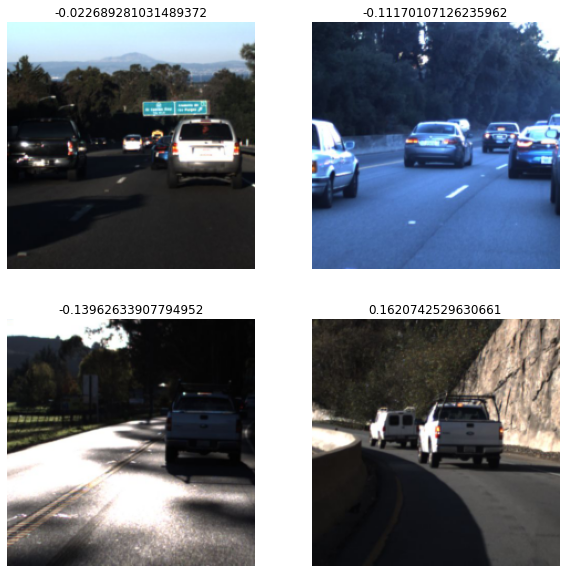

In [10]:
dls.show_batch(figsize=(10,10))

## Create Learner

In [11]:
learner = cnn_learner(dls, resnet18, metrics=mse)

In [12]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,mse,time
0,0.050473,0.047083,0.047083,31:43


epoch,train_loss,valid_loss,mse,time
0,0.027379,0.019433,0.019433,43:30


## Save the Model

In [13]:
learner.export(path/'model1.pkl')

## Load the Model

## Use the Model for Inference 

In [21]:
test_imgs = list(get_image_files(path/'Ch2_001/HMB_3_release/center/'))
len(test_imgs)

5614

In [22]:
predicted = [learner.predict(PILImage.create(file))[0] for file in test_imgs]

In [36]:
predicted[:10]

[(0.23683416843414307),
 (-0.06388713419437408),
 (-0.008263399824500084),
 (0.03838062286376953),
 (-0.004884738475084305),
 (-0.024772532284259796),
 (0.04638034477829933),
 (-0.6481895446777344),
 (0.0015579424798488617),
 (0.10193077474832535)]

In [23]:
result_df = pd.DataFrame({'filename': test_imgs, 'predicted_angle': predicted})
result_df

,filename,predicted_angle
0,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425551101830995.jpg,"(0.23683416843414307,)"
1,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425444434593057.jpg,"(-0.06388713419437408,)"
2,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425562453810013.jpg,"(-0.008263399824500084,)"
3,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425466587146615.jpg,"(0.03838062286376953,)"
4,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425456335235126.jpg,"(-0.004884738475084305,)"
...,...,...
5609,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425441932849879.jpg,"(0.024148328229784966,)"
5610,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425471587865675.jpg,"(0.08687682449817657,)"
5611,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425688725969645.jpg,"(-0.014248460531234741,)"
5612,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425580506958264.jpg,"(0.18064677715301514,)"


In [37]:
result_df.to_csv(path/'Ch2_001/naji.csv')

In [38]:
result_df = pd.read_csv(path/'Ch2_001/naji.csv')
result_df

,Unnamed: 0,filename,predicted_angle
0,0,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425551101830995.jpg,"(0.23683416843414307,)"
1,1,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425444434593057.jpg,"(-0.06388713419437408,)"
2,2,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425562453810013.jpg,"(-0.008263399824500084,)"
3,3,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425466587146615.jpg,"(0.03838062286376953,)"
4,4,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425456335235126.jpg,"(-0.004884738475084305,)"
...,...,...,...
5609,5609,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425441932849879.jpg,"(0.024148328229784966,)"
5610,5610,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425471587865675.jpg,"(0.08687682449817657,)"
5611,5611,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425688725969645.jpg,"(-0.014248460531234741,)"
5612,5612,/home/naji/Desktop/fastai_final_project/datasets/Udacity_Real_Data/4-raw-data/Ch2_001/HMB_3_release/center/1479425580506958264.jpg,"(0.18064677715301514,)"
